## Table of Contents
- [Import libraries](#1)
- [Download tables](#2)
- [Process tables](#3)
- [Download plots](#4)
- [Download plots with log10](#5)

<a name='1'></a>
## Import libraries

The script is focused on setting up an environment for data analysis and visualization. It imports a suite of libraries and modules that are essential for statistical computing, data manipulation, progress tracking, file system operations, and generating visualizations such as plots and Venn diagrams. The specific libraries imported include pandas for data structures, numpy for numerical operations, tqdm for progress bars, glob for file path retrieval, os for operating system interaction, matplotlib and seaborn for plotting and graphical representations, and matplotlib_venn for creating Venn diagrams.

Additionally, the script modifies the system path to include a custom directory, which suggests that the script will use additional custom modules and configuration settings located in this directory. These custom modules, imported with wildcard imports (from config import * and from functions import *)

In [1]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import sys
sys.path.append(r"/cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func")
from config import *
from functions import *

Data Loading: The script begins by loading data from a CSV file using the pandas library's read_csv function. The data is read into a DataFrame called data.

In [2]:
# Loading data
if not OHSU_BRCA_NEW: 
    out_df_filtered = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/{NAME_FILTERING_BRCA}', sep=";")
if OHSU_BRCA_NEW: 
    out_df_filtered = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/OHSU_BRCA_NEW/{NAME_FILTERING_BRCA}', sep=";")

In [3]:
# # Reformat tables to df.sort_values()
first_df=out_df_filtered
final_df = first_df

Adding sum for simple filtration

In [5]:
final_df.insert(loc=4,column='sum',value=final_df['size_intersection']+final_df['size_ohsu\eth']+final_df['size_eth\ohsu']+final_df['size_intersection_coor']+final_df['size_ohsu\eth_coor']+final_df['size_eth\ohsu_coor'])

final_df.insert(loc=11,column='size coords',value=(final_df['size_intersection_coor']+final_df['size_eth\ohsu_coor']+final_df['size_ohsu\eth_coor']))
final_df.insert(loc=12,column='size kmers',value=(final_df['size_intersection']+final_df['size_ohsu\eth']+final_df['size_eth\ohsu']))


,sample,filter,sum,size_intersection,size_ohsu\eth,size_eth\ohsu,size_intersection_coor,size_ohsu\eth_coor,size_eth\ohsu_coor
0,TCGAC8A12P01A11RA11507,0A512GA,163,18,102,28,3,11,1
1,TCGAC8A12P01A11RA11507,0AN1AGA,7744,118,6638,41,20,922,5
2,TCGAC8A12P01A11RA11507,0A53AGA,687,178,348,89,28,42,2
3,TCGAC8A12P01A11RA11507,02112GA,258,27,130,67,4,20,10
4,TCGAC8A12P01A11RA11507,0AN3XGA,11703,391,9755,140,62,1346,9
...,...,...,...,...,...,...,...,...,...
170,TCGAA2A0SX01A12RA08407,0A101GA,567,54,418,23,8,62,2
171,TCGAA2A0SX01A12RA08407,0A112GA,585,54,434,23,8,64,2
172,TCGAA2A0SX01A12RA08407,0A51AGA,110,19,69,7,3,10,2
173,TCGAA2A0SX01A12RA08407,0A132GA,857,76,641,32,12,94,2


Adding % for simple filtration

In [6]:
final_df.insert(loc=5,column='size intersection % total',value=(final_df['size_intersection'] / final_df['size kmers'])*100.)
final_df.insert(loc=6,column='size OHSU % total',value=(final_df['size_ohsu\eth'] / final_df['size kmers'])*100.)
final_df.insert(loc=7,column='size ETH % total',value=(final_df['size_eth\ohsu'] / final_df['size kmers'])*100.)
final_df.insert(loc=8,column='size OHSU coor % total',value=(final_df['size_ohsu\eth_coor'] / final_df['size coords'])*100.)
final_df.insert(loc=9,column='size intersection coor % total',value=(final_df['size_intersection_coor'] / final_df['size coords'])*100.)
final_df.insert(loc=10,column='size ETH coor % total',value=(final_df['size_eth\ohsu_coor'] / final_df['size coords'])*100.)


,sample,filter,sum,size intersection % total,size OHSU % total,size ETH % total,size intersection coor % total,size OHSU coor % total,size ETH coor % total
105,TCGAA2A0D201A21RA03407,02501GA,49,16.666667,83.333333,0.000000,14.285714,85.714286,0.000000
106,TCGAA2A0D201A21RA03407,0A501GA,86,9.459459,90.540541,0.000000,8.333333,91.666667,0.000000
107,TCGAA2A0D201A21RA03407,0251AGA,49,16.666667,83.333333,0.000000,14.285714,85.714286,0.000000
108,TCGAA2A0D201A21RA03407,0AN12GA,4665,1.756098,97.536585,0.707317,2.123894,97.345133,0.530973
109,TCGAA2A0D201A21RA03407,0253XGA,92,31.250000,67.500000,1.250000,33.333333,66.666667,0.000000
110,TCGAA2A0D201A21RA03407,0A13AGA,2665,16.137339,81.373391,2.489270,17.910448,81.194030,0.895522
111,TCGAA2A0D201A21RA03407,02112GA,152,15.151515,71.969697,12.878788,15.000000,75.000000,10.000000
112,TCGAA2A0D201A21RA03407,0213AGA,766,31.940299,43.731343,24.328358,33.333333,41.666667,25.000000
113,TCGAA2A0D201A21RA03407,0A51AGA,96,15.662651,84.337349,0.000000,15.384615,84.615385,0.000000
114,TCGAA2A0D201A21RA03407,0A11XGA,543,6.329114,92.194093,1.476793,7.246377,92.753623,0.000000


Sort table (after # we can drop the sum column created above)

In [7]:
if PRETTY_PLOT_SORT_BY==None and PLOT_SORT_BY =='x-axis sorted by total':
    final_df.sort_values(by=['sample','sum'], inplace = True, ascending=[False,False]) #.drop('sum')
if PRETTY_PLOT_SORT_BY==None and PLOT_SORT_BY =='x-axis sorted by intersection':
    final_df.sort_values(by=['sample','size_intersection'], inplace = True, ascending=[False,False])
if PRETTY_PLOT_SORT_BY=='x-axis sorted by percent':
    final_df.sort_values(by=['sample','size intersection % total'], inplace = True, ascending=[False,False])
final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,NAME_FINAL_SORTED_FILTER_BRCA])
final_df.to_csv(final_path,header=True,sep='\t')

,Unnamed: 0,sample,filter_foreground,filter_background,sum,size intersection % total,size OHSU % total,size ETH % total,size OHSU coor % total,size intersection coor % total,...,size_eth_coor,size_intersection_coor,size_ohsu\eth_coor,size_eth\ohsu_coor,eth_coor\inter_coor,ohsu_coor\inter_coor,inter_coor,eth_coor\ohsu_coor,ohsu_coor\eth_coor,priority
0,0,TCGAC8A12P01A11RA11507,"(0, Any, 5)","(1, 2)",163,12.162162,68.918919,18.918919,73.333333,20.000000,...,4,3,11,1,['54629621:54631737'],"['47436:48113', '46964074:46976711', '94419535...","['54632381:54634783', '124913213:124913524', '...",{'54629621:54631737'},"{'47436:48113', '46964074:46976711', '94419535...",2.0
1,1,TCGAC8A12P01A11RA11507,"(0, Any, None)","(1, Any)",7744,1.736060,97.660733,0.603207,97.360084,2.111932,...,25,20,922,5,"['54629621:54631737', '165495630:165495659:165...","['65667478:65667506', '85678183:85678268', '15...","['165495630:165495659', '124913213:124913524',...","{'54629621:54631737', '165495630:165495659:165...","{'65667478:65667506', '85678183:85678268', '15...",0.0
2,2,TCGAC8A12P01A11RA11507,"(0, Any, 5)","(3, Any)",687,28.943089,56.585366,14.471545,58.333333,38.888889,...,30,28,42,2,"['54629621:54631737', '43992190:43993798']","['47436:48113', '43958513:43973615', '50841780...","['52238774:52241471', '94400288:94401565', '17...","{'54629621:54631737', '43992190:43993798'}","{'47436:48113', '43958513:43973615', '50841780...",0.0
3,3,TCGAC8A12P01A11RA11507,"(0, 2, 1)","(1, 2)",258,12.053571,58.035714,29.910714,58.823529,11.764706,...,14,4,20,10,"['54629621:54631737', '107516805:107670488', '...","['36286792:36295504', '14848971:14852433', '13...","['54632381:54634783', '2765464:2765539', '2363...","{'54629621:54631737', '107516805:107670488', '...","{'14848971:14852433', '135255225:135258421', '...",2.0
4,4,TCGAC8A12P01A11RA11507,"(0, Any, None)","(3, 10)",11703,3.801283,94.837643,1.361073,94.989414,4.375441,...,71,62,1346,9,"['54629621:54631737', '6234468:6234492', '1654...","['127660559:127660584', '65667478:65667506', '...","['165495630:165495659', '39724837:39724895', '...","{'54629621:54631737', '54629621:54632240', '62...","{'127660559:127660584', '65667478:65667506', '...",1.0
5,5,TCGAC8A12P01A11RA11507,"(0, Any, None)","(1, 10)",7744,1.736060,97.660733,0.603207,97.360084,2.111932,...,25,20,922,5,"['54629621:54631737', '165495630:165495659:165...","['65667478:65667506', '85678183:85678268', '15...","['165495630:165495659', '124913213:124913524',...","{'54629621:54631737', '165495630:165495659:165...","{'65667478:65667506', '85678183:85678268', '15...",1.0
6,6,TCGAC8A12P01A11RA11507,"(0, Any, 1)","(0, 1)",663,10.634648,84.048027,5.317324,83.750000,12.500000,...,13,10,67,3,"['54629621:54631737', '113393904:113393934:113...","['50185802:50185841', '50196339:50197965', '13...","['2765464:2765539', '23639347:23639793', '1007...","{'54629621:54631737', '113393904:113393934:113...","{'50185802:50185841', '50196339:50197965', '13...",NaN
7,7,TCGAC8A12P01A11RA11507,"(0, Any, None)","(3, 2)",9232,2.415578,96.413606,1.170816,96.779964,2.683363,...,36,30,1082,6,"['54629621:54631737', '165495630:165495659:165...","['65667478:65667506', '13900808:13906586', '15...","['165495630:165495659', '39724837:39724895', '...","{'54629621:54631737', '165495630:165495659:165...","{'65667478:65667506', '13900808:13906586', '15...",2.0
8,8,TCGAC8A12P01A11RA11507,"(0, Any, 1)","(3, Any)",2868,13.647152,80.577532,5.775316,80.882353,16.764706,...,65,57,275,8,"['54629621:54631737', '43992190:43993798', '62...","['50185802:50185841', '99375474:99399630', '12...","['52238774:52241471', '39724837:39724895', '94...","{'54629621:54631737', '54629621:54632240', '43...","{'50185802:50185841', '99375474:99399630', '12...",0.0
9,9,TCGAC8A12P01A11RA11507,"(0, 2, 5)","(1, 10)",44,20.000000,30.000000,50.000000,50.000000,25.000000,...,2,1,2,1,['54629621:54631737'],"['28715375:28734979', '16382121:16382444']",['54632381:54634783'],{'54629621:54631737'},"{'28715375:28734979', '16382121:16

Data Selection and Renaming: Columns in data tables are renamed for consistency and clarity, and DataFrames are assigned to new variables for subsequent operations. Conditional File Path Creation: Depending on a condition, file paths for saving the data are generated, indicating a system that adapts to different data versions or stages of processing. Data Export: The prepared DataFrame is exported to a CSV file, using tab separation, suggesting the output is formatted for specific requirements or further analysis. Data Loop Processing: The script processes data for each sample within a set, performing steps such as aggregation and sorting, tailored to the analysis needs. Visualization Data Structuring: Data is organized into structures suitable for visualization, such as vectors representing categories or conditions. Graphical Representation: Custom plotting functions are employed to create visual representations of the data, like bar plots, facilitating the interpretation and comparison of the results.

<Figure size 3200x1800 with 0 Axes>

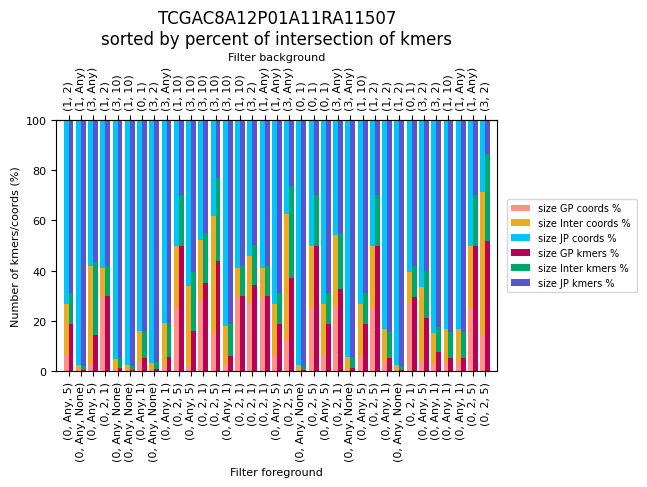

<Figure size 3200x1800 with 0 Axes>

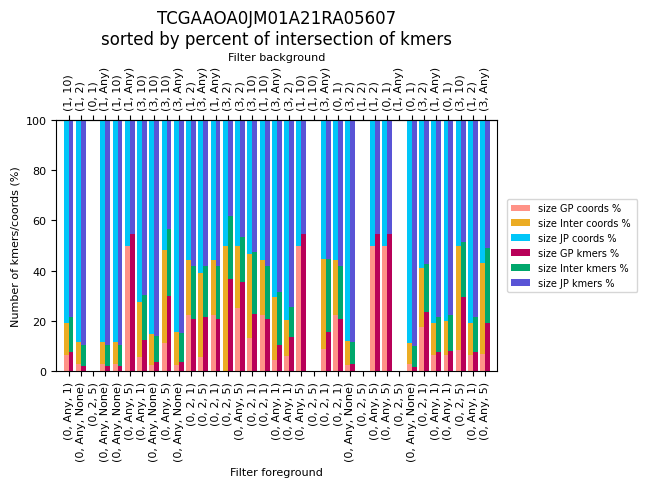

<Figure size 3200x1800 with 0 Axes>

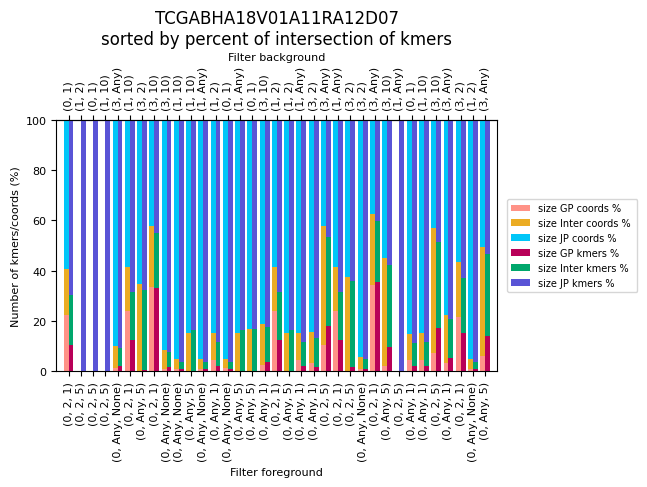

<Figure size 3200x1800 with 0 Axes>

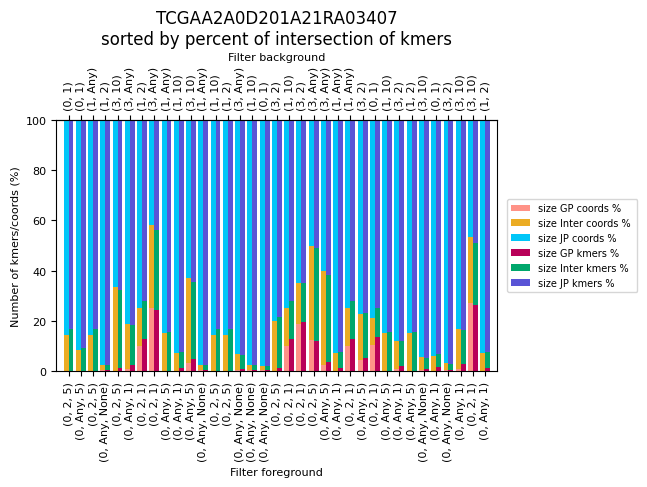

<Figure size 3200x1800 with 0 Axes>

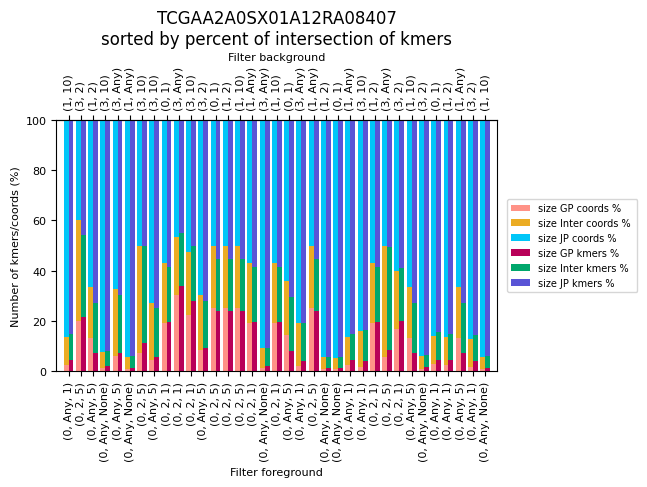

In [8]:
import matplotlib
matplotlib.rcParams.update({'font.size':4})
df_percent = pd.DataFrame()

PATTERN='[\d+]{1,7}|Any'
FILTER_PATTERN='[\d+]{1,7}|Any'
SAMPLE_PATTERN='SampleLim[\d+]{1,7}\.'
COHORTLIM_PATTERN='Cohort[Ll]im[\d+]{1,7}\.'
ACROSS_PATTERN='Across[\d+]{1,7}|AcrossAny'
restricts=['TCGAC8A12P01A11RA11507',
                 'TCGAAOA0JM01A21RA05607',
                 'TCGABHA18V01A11RA12D07',
                 'TCGAA2A0D201A21RA03407',
                 'TCGAA2A0SX01A12RA08407']

for sample in restricts:
    data_df = final_df.loc[(final_df['sample']==sample)]
    ninter=np.array(data_df['size intersection % total'])
    ns_ETH=np.array(data_df['size ETH % total'])
    ns_OHSU=np.array(data_df['size OHSU % total'])
    ninter_coor=np.array(data_df['size intersection coor % total'])
    ns_ETH_coor=np.array(data_df['size ETH coor % total'])
    ns_OHSU_coor=np.array(data_df['size OHSU coor % total'])
    coord=np.array(data_df['size coords'])
    kmer=np.array(data_df['size kmers'])
    filter_foreground = np.array(data_df['filter_foreground'])
    filter_background = np.array(data_df['filter_background'])
        
    filfor = []
    filbac = []   

    for ff in filter_foreground:
            if ff != 'non' and not OHSU_BRCA_NEW:
                filter_sample=re.findall(PATTERN,re.findall(SAMPLE_PATTERN,ff)[0])[0]
                filter_cohorlim=re.findall(PATTERN,re.findall(COHORTLIM_PATTERN,ff)[0])[0]
                filter_across=re.findall(PATTERN,re.findall(ACROSS_PATTERN,ff)[0])[0]
                filfor.append(f'({filter_sample}, {filter_cohorlim}, {filter_across})')
            else:
                filfor.append(ff)

    for fb in filter_background:
            if fb != 'filtered' and not OHSU_BRCA_NEW:
                filter_cohorlim=re.findall(PATTERN,re.findall(COHORTLIM_PATTERN,fb)[0])[0]
                filter_across=re.findall(PATTERN,re.findall(ACROSS_PATTERN,fb)[0])[0]
                filbac.append(f'({filter_cohorlim}, {filter_across})')
            else:
                filbac.append(fb)
    snum = np.array(data_df['sum'])
    
    
    
    
    axis = {
            'size GP kmers % ':ns_ETH,
            'size Inter kmers % ':ninter,
            'size JP kmers % ':ns_OHSU,
            'size GP coords % ':ns_ETH_coor,
            'size Inter coords % ':ninter_coor,
            'size JP coords % ':ns_OHSU_coor
           }
    axis_df = pd.DataFrame(axis)
        
    fffb=[]
    for i in range(len(filfor)):
          fffb.append(filfor[i]+' '+filbac[i])
        
    lg = len(filfor)
    
    x_main = filfor
    x_secondary = filbac
    plt.figure(figsize=(32, 18))
    
    x = filfor
    bottom =np.zeros(lg)

    fig,ax=plt.subplots()
    bw=0.4
    # Построение первой секции каждого столбца
    axis_df['size GP coords % '].plot.bar(stacked=True,color='#ff9287', width=bw, position=1, ax=ax)
    bottom=axis_df['size GP coords % ']
    axis_df['size Inter coords % '].plot.bar(stacked=True,color='#ebac23', width=bw, position=1, ax=ax,bottom=bottom)
    bottom+=axis_df['size Inter coords % ']
    axis_df['size JP coords % '].plot.bar(stacked=True,color='#00c6f8', width=bw, position=1, ax=ax,bottom=bottom)
    
    
    # Построение второй и третьей секции каждого столбца
    axis_df['size GP kmers % '].plot.bar(stacked=True,color='#b80058' , width=bw, sharex=True, ax=ax, position=0)
    bottom=axis_df['size GP kmers % ']
    axis_df['size Inter kmers % '].plot.bar(stacked=True,color='#00a76c', width=bw, position=0, ax=ax,bottom=bottom)
    bottom+=axis_df['size Inter kmers % ']
    axis_df['size JP kmers % '].plot.bar(stacked=True,color='#5954d6', width=bw, position=0, ax=ax,bottom=bottom)

    plt.ylim(0,100)
    bar_width=0.8
    bar_position_ETH=range(len(ns_ETH))
    ax.set_xticks([pos for pos in bar_position_ETH])
    ax.set_xticklabels(x_main,rotation=90,ha='center',fontsize=8)
    plt.yticks(fontsize=8)
    ax.set_xlabel('Filter foreground',fontsize=8)
    ax.set_ylabel('Number of kmers/coords (%)',fontsize=8)
    if PRETTY_PLOT_SORT_BY == None:
        SALT = 'sorted by '+PLOT_SORT_BY + ' of intersection of kmers'
    else:
        SALT = 'sorted by '+PRETTY_PLOT_SORT_BY + ' of intersection of kmers'
    ax.set_title(sample+'\n'+SALT,fontsize=12)
    
    plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left',fontsize=7)
    
    ax_sec = ax.secondary_xaxis('top')
    ax_sec.set_xticks([pos for pos in bar_position_ETH])
    ax_sec.set_xticklabels(x_secondary,rotation=90,ha='center',fontsize=8)
    ax_sec.set_xlabel('Filter background',fontsize=8)
    
    plt.xlim([-1,35])
    plt.tight_layout() 
    plt.savefig('test_proportions.png',dpi=300)
    if not OHSU_BRCA_NEW:  
        plt.savefig(create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,SALT,NAME_PROPORTIONAL_PLOT+PDF]), bbox_inches='tight', pad_inches=0.02, dpi=300)
        plt.savefig(create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,SALT,NAME_PROPORTIONAL_PLOT+PNG]), bbox_inches='tight', pad_inches=0.02, dpi=300)
    if OHSU_BRCA_NEW: 
        plt.savefig(create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,'OHSU_BRCA_NEW',SALT,NAME_PROPORTIONAL_PLOT+PDF]), bbox_inches='tight', pad_inches=0.02, dpi=300)
        plt.savefig(create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_SAMPLES,sample,'OHSU_BRCA_NEW',SALT,NAME_PROPORTIONAL_PLOT+PNG]), bbox_inches='tight', pad_inches=0.02, dpi=300)

    plt.show()
    plt.close()